### Constructing an ETS Model applied on champagne-sales

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
from Starts.startvis import *
from Starts.startspk import *
%matplotlib inline

local_kwargs {'data_path': './data/single-family-home-sales.xlsx, ./data/champagne-sales.xlsx', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
sales = idata[1]
sales.head()

,Month,Champagne Sales
0,1-01,2851
1,1-02,2672
2,1-03,2755
3,1-04,2721
4,1-05,2946


In [3]:
sales.tail()

,Month,Champagne Sales
91,8-08,1659
92,8-09,5951
93,8-10,6981
94,8-11,9851
95,8-12,12670


In [4]:
sales.reset_index(inplace=True)
sales['Month'] = pd.to_datetime(sales['Month'], format='%m-%d', utc=False)
sales = sales.set_index('Month')
sales.head()

,index,Champagne Sales
Month,,
1900-01-01,0,2851
1900-01-02,1,2672
1900-01-03,2,2755
1900-01-04,3,2721
1900-01-05,4,2946


In [5]:
sales.drop('index', axis=1, inplace=True)

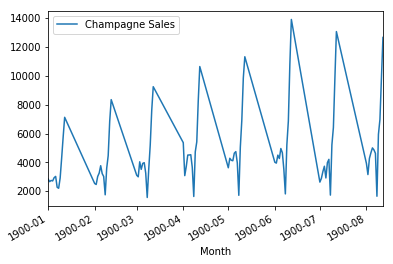

In [6]:
sales.plot()

In [7]:
type(sales), sales.columns

(pandas.core.frame.DataFrame, Index(['Champagne Sales'], dtype='object'))

In [8]:
# decompose into ETS Error (Residual) Trend Seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales['Champagne Sales'], model='multiplicative', freq=10)

/usr/local/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
result

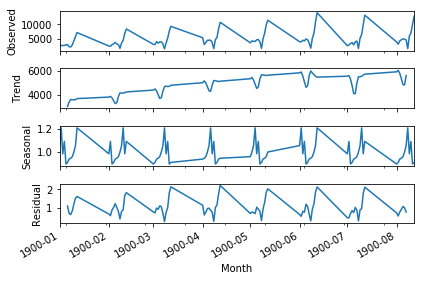

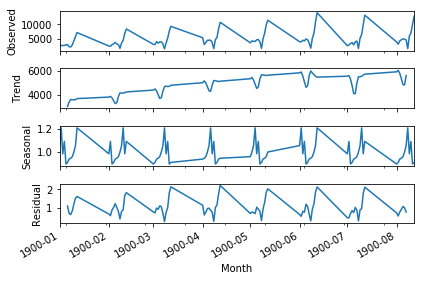

In [10]:
result.plot()